# 데이터 세트 준비 

In [5]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.data.shape, cancer.target.shape)

(569, 30) (569,)


데이터 세트가 잘 받아졌는지 확인

In [7]:
cancer.data[:3]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

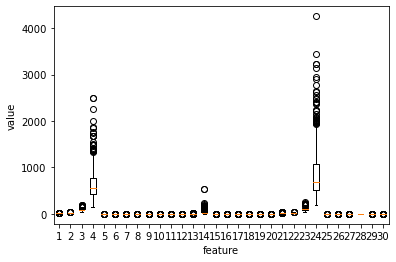

In [13]:
import matplotlib.pyplot as plt
plt.boxplot(cancer.data)
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

### 타킷 데이터 확인 , 훈련 데이터 준비 

In [15]:
import numpy as np
np.unique(cancer.target, return_counts=True)

(array([0, 1]), array([212, 357], dtype=int64))

In [16]:
x = cancer.data
y = cancer.target

### 훈련 세트와 테스트 세트 나누기
* 훈련 데이터 세트를 나눌 때는 테스트 세트보다 훈련 세트가 더 많아야 합니다.
* 훈련 데이터 세트를 나누기 전에 양성, 음성 클래스가 훈련 세트나 테스트 세트의 어느 한쪽에 몰리지 않도록 골고루 섞어야 합니다.

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

In [20]:
# 분할 결과 확인
print(x_train.shape, x_test.shape) 
np.unique(y_train, return_counts=True)

(455, 30) (114, 30)


(array([0, 1]), array([170, 285], dtype=int64))

### 로지스틱 뉴런 구현하기

In [24]:
class LogisticNeuron:
    
    def __init__(self): # 가중치(w), 절편(b) None으로 지정
        self.w = None
        self.b = None
        
    def forpass(self, x): # 정방향 계산, 직선방정식 계산
        z = np.sum(x * self.w) + self.b
        return z
    
    def backprop(self, x, err): # 역방향 계산
        w_grad = x * err
        b_grad = 1 * err
        return w_grad, b_grad
    
    def fit(self, x, y, epochs=100): # 훈련함수
        self.w = np.ones(x.shape[1])
        self.b = 0
        for i in range(epochs):      # epochs만큼 훈련반복
            for x_i, y_i in zip(x,y):
                z = self.forpass(x_i)
                a = self.activation(z)
                err = -(y_i - a)     # 오차 계산 *손실 함수의 미분한 결과와 동일하게 하기 위해 '-'붙힘
                w_grad, b_grad = self.backprop(x_i, err)
                self.w -= w_grad     # 가중치 업데이트 
                self.b -= b_grad     # 절편 업데이트
                
    def activation(self, z):      # 활성화 함수
        a = 1 / (1 + np.exp(-z))  # 시그모이드 계산
        return a
    
    def predict(self, x):   # y_hat 계산함수
        z = [self.forpass(x_i) for x_i in x]
        a = self.activation(np.array(z))
        return a > 0.5

### 모델 훈련하고 결과 확인

In [22]:
neuron = LogisticNeuron()
neuron.fit(x_train, y_train)

<ipython-input-21-8d4fa5c13b30>:29: RuntimeWarning: overflow encountered in exp
  a = 1 / (1 + np.exp(-z))  # 시그모이드 계산


In [23]:
np.mean(neuron.predict(x_test) == y_test)

<ipython-input-21-8d4fa5c13b30>:29: RuntimeWarning: overflow encountered in exp
  a = 1 / (1 + np.exp(-z))  # 시그모이드 계산


0.8245614035087719

# 로지스틱 뉴런 클래스 업데이트
### 손실 함수 결과값 저장 기능 추가하기

In [45]:
class SingleLayer:
    
    def __init__(self):
        self.w = None
        self.b = None
        self.losses = [] 
        
    def forpass(self, x): 
        z = np.sum(x * self.w) + self.b
        return z
    
    def backprop(self, x, err): 
        w_grad = x * err
        b_grad = 1 * err
        return w_grad, b_grad
    
    def fit(self, x, y, epochs=100): 
        self.w = np.ones(x.shape[1])
        self.b = 0
        for i in range(epochs):
            loss = 0
            indexes = np.random.permutation(np.arange(len(x))) # 확률적 경사하강법을 사용
            for i in indexes:
                z = self.forpass(x[i])
                a = self.activation(z)
                err = -(y[i] - a)     
                w_grad, b_grad = self.backprop(x[i], err)
                self.w -= w_grad      
                self.b -= b_grad
                a = np.clip(a, 1e-10, 1-1e-10)  # 안전한 로그계산을 위해 두 매개변수의 값을 벗어나는 a는 잘라낸다.
                loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
            self.losses.append(loss/len(y)) # 손실함수의 결과값이 epochs가 반복됨에 따라서 줄어들고 있는지 확인하기 위함.
                
    def activation(self, z):      
        a = 1 / (1 + np.exp(-z))  
        return a
    
    def predict(self, x):   # y_hat 계산함수
        z = [self.forpass(x_i) for x_i in x]
        a = self.activation(np.array(z))
        return a > 0.5
       #return np.array(z) > 0 // 효율성을 위해 activation함수 계산 없이 사용 가능.
    
    def score(self, x, y):
        return np.mean(self.predict(x) == y)

### 단일층 신경망 훈련하기 

In [46]:
layer = SingleLayer()
layer.fit(x_train, y_train)
layer.score(x_test, y_test)

<ipython-input-45-4c673fd05b29>:35: RuntimeWarning: overflow encountered in exp
  a = 1 / (1 + np.exp(-z))  # 시그모이드 계산


0.9473684210526315

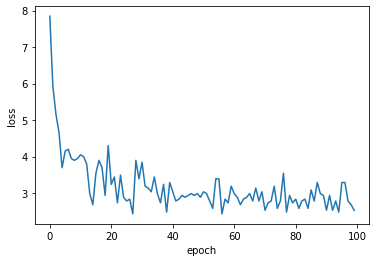

In [47]:
plt.plot(layer.losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### 사이킷런으로 로지스틱 회귀를 수행

In [52]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log', max_iter=100, tol=1e-3, random_state=42)
sgd.fit(x_train, y_train)
sgd.score(x_test, y_test)

0.8333333333333334

In [53]:
sgd.predict(x_test[0:10])

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0])